# Data Understanding

In [2]:
import imblearn
from imblearn.over_sampling import SMOTENC
import numpy as np
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from jupyterthemes import jtplot
jtplot.style(theme='monokai',context='notebook',ticks=True, grid=False)
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.cluster import KMeans
import lifelines

pd.set_option("display.max_columns", None)

In [3]:
hr_df = pd.read_csv(os.path.join('Human_resources.csv'))
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
hr_df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [5]:
hr_df = hr_df.drop(columns=['EmployeeCount', 'StandardHours', 'EmployeeNumber', 'Over18'])
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DailyRate'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>,
        <AxesSubplot:title={'center':'EnvironmentSatisfaction'}>],
       [<AxesSubplot:title={'center':'HourlyRate'}>,
        <AxesSubplot:title={'center':'JobInvolvement'}>,
        <AxesSubplot:title={'center':'JobLevel'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>],
       [<AxesSubplot:title={'center':'MonthlyRate'}>,
        <AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'PercentSalaryHike'}>,
        <AxesSubplot:title={'center':'PerformanceRating'}>,
        <AxesSubplot:title={'center':'RelationshipSatisfaction'}>],
       [<AxesSubplot:title={'center':'StockOptionLevel'}>,
        <AxesSubplot:title={'center':'TotalWorkingYears'}>,
        <AxesSubplot:title

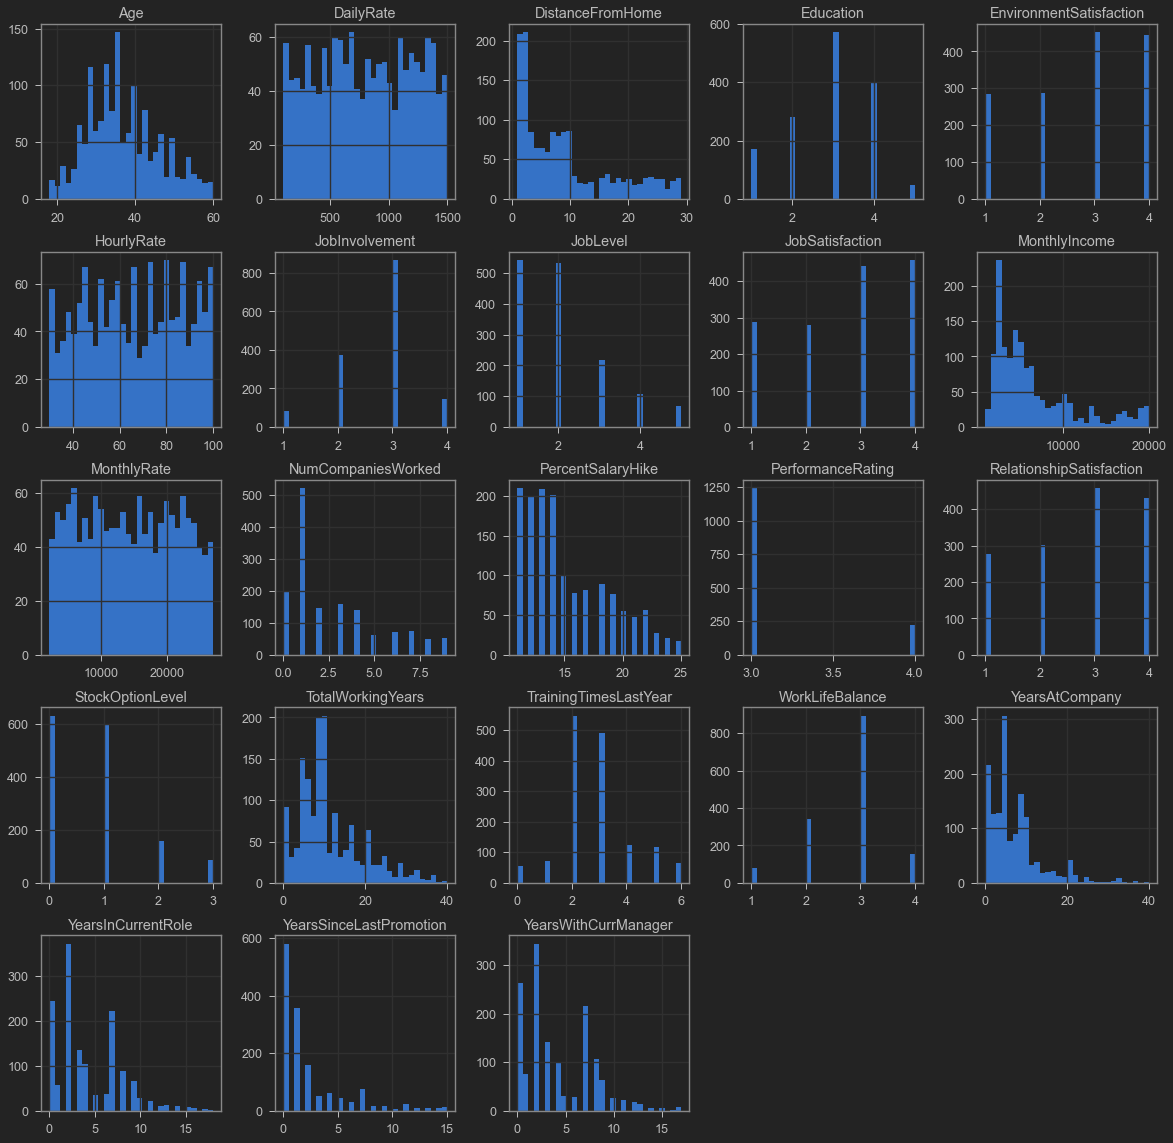

In [6]:
hr_df.hist(bins=30, figsize=(20,20), color='b')

# Data Preparation

<AxesSubplot:>

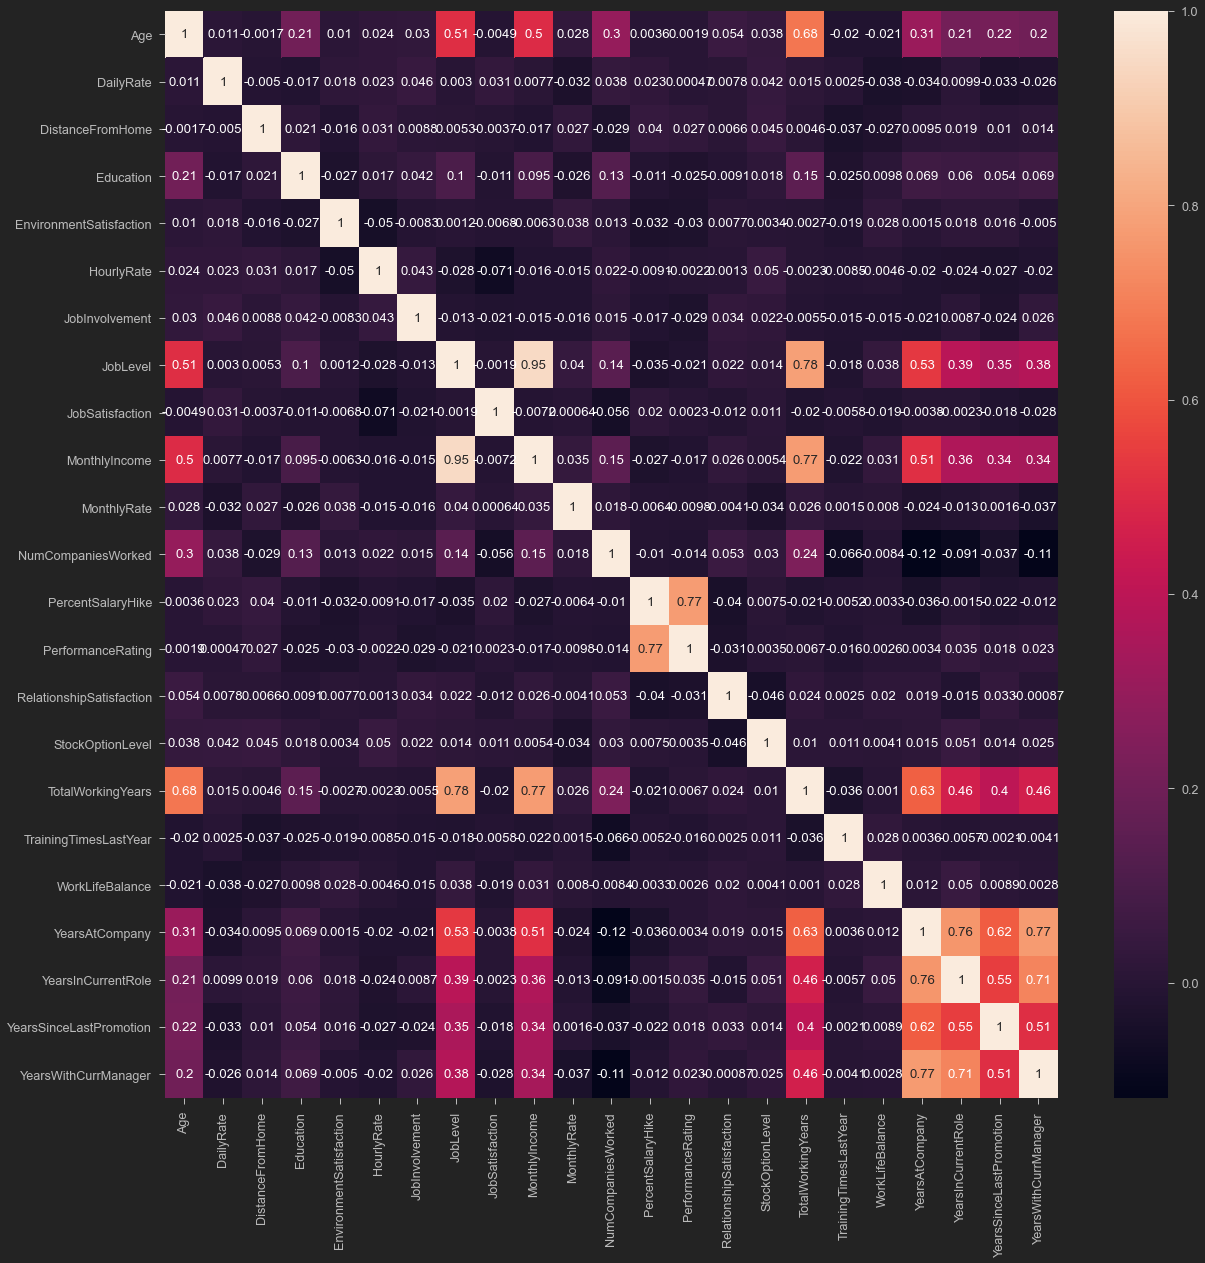

In [7]:
corr_df = hr_df.corr()
f, ax = plt.subplots(figsize=(20,20))
sns.heatmap(corr_df, 
            xticklabels=corr_df.columns,
            yticklabels=corr_df.columns,
           annot=True)

In [8]:
hr_df = hr_df.drop(columns=['JobLevel'])
hr_df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [9]:
# encode dependent feature
hr_df['Attrition'] = np.where(hr_df['Attrition'] == 'Yes', 1, 0)
hr_df['OverTime'] = np.where(hr_df['OverTime'] == 'Yes', 1, 0)

In [10]:
biz_travel_dummies = pd.get_dummies(hr_df['BusinessTravel'], prefix='BusinessTravel')
dep_dummies = pd.get_dummies(hr_df['Department'], prefix='Department')
edu_dummies = pd.get_dummies(hr_df['Education'], prefix='Education')
edu_field_dummies = pd.get_dummies(hr_df['EducationField'], prefix='EducationField')
env_satisfy_dummies = pd.get_dummies(hr_df['EnvironmentSatisfaction'], prefix='EnvironmentSatisfaction')
gender_dummies = pd.get_dummies(hr_df['Gender'], prefix='Gender')
job_involve_dummies = pd.get_dummies(hr_df['JobInvolvement'], prefix='JobInvolvement')
job_role_dummies = pd.get_dummies(hr_df['JobRole'], prefix='JobRole')
job_satisfy_dummies = pd.get_dummies(hr_df['JobSatisfaction'], prefix='JobSatisfaction')
marital_dummies = pd.get_dummies(hr_df['MaritalStatus'], prefix='MaritalStatus')
overtime_dummies = pd.get_dummies(hr_df['OverTime'], prefix='OverTime')
perf_dummies = pd.get_dummies(hr_df['PerformanceRating'], prefix='PerformanceRating')
rel_dummies = pd.get_dummies(hr_df['RelationshipSatisfaction'], prefix='RelationshipSatisfaction')
stock_dummies = pd.get_dummies(hr_df['StockOptionLevel'], prefix='StockOptionLevel')
work_dummies = pd.get_dummies(hr_df['WorkLifeBalance'], prefix='WorkLifeBalance')

X_categ = pd.concat([biz_travel_dummies, dep_dummies, edu_dummies, edu_field_dummies, 
                      env_satisfy_dummies, gender_dummies, job_involve_dummies, 
                      job_role_dummies, job_satisfy_dummies, marital_dummies, 
                      overtime_dummies, perf_dummies, rel_dummies, stock_dummies, 
                      work_dummies], axis=1)
X_categ.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Female,Gender_Male,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_0,OverTime_1,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0
1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
2,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0
3,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0
4,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0


In [11]:
X_numeric=hr_df[['Age', 'DailyRate', 'DistanceFromHome', 'Education','EnvironmentSatisfaction', 'HourlyRate','JobInvolvement', 'JobSatisfaction', 'MonthlyIncome',
                       'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
                      'TotalWorkingYears', 'TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager' ]]

In [12]:
X_final=pd.concat([X_categ, X_numeric], axis=1)
X_final.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Female,Gender_Male,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_0,OverTime_1,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,41,1102,1,2,2,94,3,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5
1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,49,279,8,1,3,61,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7
2,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,37,1373,2,2,4,92,2,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0
3,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,33,1392,3,4,4,56,3,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0
4,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,27,591,2,1,1,40,3,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2


# General approach:

## 1. Identifying the Clusters

## 2. Prediction models: Random Forest

## 3. Survival Analysis

# Developing general approach:

## 1. Finding the optimal number of clusters using the "Elbow method"

### Scaling and Transforming Data

In [13]:
scaler=StandardScaler()
X_final_scaled=scaler.fit_transform(X_final)

### Using the Elbow Method to determine Clusters

c:\tools\Anaconda3\envs\human-resources\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=6.
  warnings.warn(


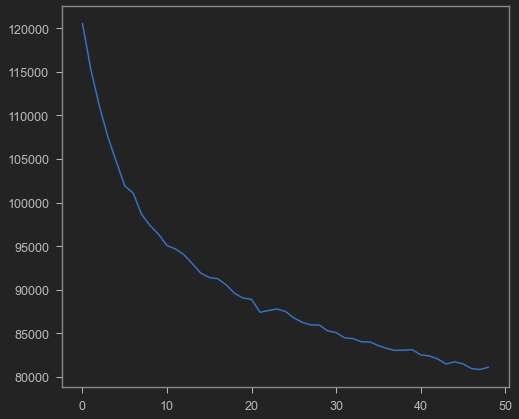

In [14]:
scores=[]
range_val=range(1,50)
for i in range_val:
    kmeans=KMeans(n_clusters=i)
    kmeans.fit(X_final_scaled)
    scores.append(kmeans.inertia_)
plt.plot(scores,'bx-')

### From the graph we will choose 10 clusters

### Applying K-means method

In [15]:
kmeans=KMeans(10)
kmeans.fit(X_final_scaled)
labels=kmeans.labels_

In [16]:
cluster_centers=pd.DataFrame(data=kmeans.cluster_centers_,columns=[X_final.columns])
cluster_centers.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Female,Gender_Male,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_0,OverTime_1,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.015282,-0.038618,0.023076,-0.211604,0.279386,-0.195916,-0.111464,0.020732,0.049672,0.020821,-0.033683,-0.136788,0.218908,-0.176537,-0.048008,-0.126865,0.059012,0.152318,-0.055261,-0.147624,0.065108,-0.054433,0.054433,-0.013558,-0.004057,0.073596,-0.105270,0.155198,-0.191498,0.237481,-0.010708,-0.017795,-0.004798,0.036829,-0.148684,-0.186858,0.042108,0.092164,-0.074176,-0.040810,-0.118097,0.098036,0.000583,0.006645,-0.006645,-0.091281,0.091281,0.202070,-0.114018,0.016735,-0.089003,0.048653,0.124699,-0.088733,-0.247733,4.168333,-0.552726,-1.244050,-0.340842,0.022943,0.053601,0.056862,0.059003,-0.062629,-0.104211,-0.032707,-0.080339,-0.161798,-0.039100,0.176255,-0.006645,0.084860,0.091281,-0.140858,-0.196306,-0.101086,-0.113270,-2.493820,-0.160259,-0.243680,-0.153484,-0.075638
1,-0.005299,-0.001694,0.004993,-0.211604,0.727775,-0.659960,-0.006595,-0.032502,0.052777,0.019642,-0.110015,-0.136788,0.129485,-0.348255,0.025528,0.118462,0.083043,0.008382,-0.018833,0.022987,-0.014048,-0.023176,0.023176,-0.036513,-0.064296,0.015815,0.096476,0.223659,-0.191498,0.362799,-0.255875,0.313573,-0.162904,0.301115,-0.533821,-0.244625,0.043719,-0.062487,0.087080,-0.070713,0.441617,0.273100,-0.685565,0.628241,-0.628241,0.426230,-0.426230,-0.011137,0.127360,0.004673,-0.108303,-0.867229,0.704003,0.456614,-0.247733,-0.239904,0.189893,-0.045729,-0.011936,-0.148020,0.076384,-0.007590,-0.013051,-0.005135,0.067885,0.103416,-0.038987,-0.377812,-0.006104,0.051164,-0.628241,-0.286428,-0.426230,-0.085265,0.534207,-0.253777,-0.006926,0.035118,-0.195986,-0.129608,-0.169443,-0.061453
2,0.004650,-0.040970,0.032191,4.725816,-1.374051,-0.659960,-0.092055,0.038248,0.085979,-0.104896,0.107306,3.330086,-0.382146,-0.348255,-0.271081,-0.017683,-0.072862,-0.052642,0.029412,0.228768,-0.209918,-0.147814,0.147814,-0.020529,0.087175,-0.113867,0.076467,-0.312785,4.661978,-0.462464,0.134037,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.017471,0.261353,-0.129322,-0.078511,0.086974,0.188474,-0.278904,0.054107,-0.054107,0.043833,-0.043833,-0.171735,-0.083330,0.144722,0.073998,0.003602,0.052125,-0.180026,0.121605,0.064112,-0.267664,0.062354,0.223771,-0.006761,-0.149309,-0.070560,0.034528,-0.060946,-0.160080,-0.008145,-0.113493,-0.168422,-0.078296,0.115956,-0.054107,-0.094967,-0.043833,0.186473,-0.000909,-0.166728,-0.178731,0.216031,-0.136461,-0.22

### Applying inverse transformation to understand the numbers

In [17]:
cluster_centers=scaler.inverse_transform(cluster_centers)
cluster_centers=pd.DataFrame(data=cluster_centers,columns=[X_final.columns])
cluster_centers.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Female,Gender_Male,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_0,OverTime_1,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.106667,0.173333,0.720000,-6.938894e-18,7.866667e-01,2.133333e-01,0.080000,0.200000,0.413333,0.280000,0.026667,0.000000e+00,0.520000,5.333333e-02,0.293333,0.026667,0.106667,0.253333,0.173333,0.240000,0.333333,0.373333,0.626667,0.053333,0.253333,0.626667,0.066667,1.333333e-01,6.938894e-18,2.666667e-01,0.066667,9.333333e-02,5.333333e-02,2.133333e-01,1.600000e-01,1.333333e-02,0.213333,0.226667,0.266667,0.293333,1.733333e-01,0.506667,3.200000e-01,0.720000,2.800000e-01,0.813333,1.866667e-01,0.266667,0.160000,0.32000,0.253333,4.533333e-01,4.666667e-01,8.000000e-02,-6.938894e-18,1.000000e+00,-1.110223e-16,2.220446e-16,2.775558e-17,37.133333,824.106667,9.653333,2.973333,2.653333,63.773333,2.706667,2.640000,5741.453333,14034.893333,3.133333,2.800000e-01,15.520000,3.186667,2.560000,6.266667e-01,10.493333,2.653333,1.000000,6.026667,3.346667,1.693333,3.853333
1,0.100437,0.187773,0.711790,0.000000e+00,1.000000e+00,2.775558e-16,0.113537,0.179039,0.414847,0.279476,0.013100,1.734723e-17,0.475983,5.551115e-17,0.327511,0.082969,0.113537,0.196507,0.187773,0.318777,0.296943,0.388646,0.611354,0.048035,0.227074,0.598253,0.126638,1.528384e-01,1.387779e-17,3.144105e-01,0.004367,1.921397e-01,1.746725e-02,3.187773e-01,5.551115e-17,0.000000e+00,0.213974,0.165939,0.340611,0.279476,4.061135e-01,0.593886,2.775558e-16,1.000000,1.665335e-16,1.000000,0.000000e+00,0.183406,0.257642,0.31441,0.244541,2.775558e-16,7.510917e-01,2.489083e-01,0.000000e+00,-2.775558e-17,3.144105e-01,5.851528e-01,1.004367e-01,35.572052,833.296943,9.131004,2.899563,2.716157,67.270742,2.803493,2.685590,4724.812227,14269.672489,2.820961,1.665335e-16,14.161572,3.000000,2.620087,1.248908e+00,9.305677,2.790393,2.786026,5.807860,3.759825,1.641921,3.903930
2,0.103448,0.172414,0.724138,1.000000e+00,2.220446e-16,5.551115e-17,0.086207,0.206897,0.431034,0.224138,0.051724,4.655172e-01,0.224138,-1.387779e-17,0.189655,0.051724,0.068966,0.172414,0.206897,0.413793,0.206897,0.327586,0.672414,0.051724,0.293103,0.534483,0.120690,1.387779e-17,8.965517e-01,-2.775558e-17,0.103448,0.000000e+00,0.000000e+00,0.000000e+00,8.326673e-17,-2.081668e-17,0.189655,0.293103,0.241379,0.275862,2.586207e-01,0.551724,1.896552e-01,0.741379,2.586207e-01,0.862069,1.379310e-01,0.120690,0.172414,0.37931,0.327586,4.310345e-01,4.310345e-01,5.172414e-02,8.620690e-02,6.896552e-02,1.206897e-01,6.379310e-0

### Concatenating Cluster Labels to Dataset

In [18]:
df_cluster=pd.concat([X_final,pd.DataFrame({'Cluster':labels})], axis=1)
df_cluster.head(10)

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,Department_Human Resources,Department_Research & Development,Department_Sales,Education_1,Education_2,Education_3,Education_4,Education_5,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,EnvironmentSatisfaction_1,EnvironmentSatisfaction_2,EnvironmentSatisfaction_3,EnvironmentSatisfaction_4,Gender_Female,Gender_Male,JobInvolvement_1,JobInvolvement_2,JobInvolvement_3,JobInvolvement_4,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,JobSatisfaction_1,JobSatisfaction_2,JobSatisfaction_3,JobSatisfaction_4,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single,OverTime_0,OverTime_1,PerformanceRating_3,PerformanceRating_4,RelationshipSatisfaction_1,RelationshipSatisfaction_2,RelationshipSatisfaction_3,RelationshipSatisfaction_4,StockOptionLevel_0,StockOptionLevel_1,StockOptionLevel_2,StockOptionLevel_3,WorkLifeBalance_1,WorkLifeBalance_2,WorkLifeBalance_3,WorkLifeBalance_4,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Cluster
0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,1,0,0,0,1,0,0,0,1,0,0,0,41,1102,1,2,2,94,3,4,5993,19479,8,1,11,3,1,0,8,0,1,6,4,0,5,0
1,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,49,279,8,1,3,61,2,2,5130,24907,1,0,23,4,4,1,10,3,3,10,7,1,7,5
2,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,1,0,0,1,0,0,1,0,0,0,0,0,1,0,37,1373,2,2,4,92,2,3,2090,2396,6,1,15,3,2,0,7,3,3,0,0,0,0,7
3,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0,1,0,1,0,0,0,0,0,1,0,33,1392,3,4,4,56,3,3,2909,23159,1,1,11,3,3,0,8,3,3,8,7,3,0,7
4,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,27,591,2,1,1,40,3,2,3468,16632,9,0,12,3,4,1,6,3,3,2,2,2,2,1
5,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,32,1005,2,2,4,79,3,4,3068,11864,0,0,13,3,3,0,8,2,2,7,7,3,6,3
6,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,0,0,0,0,1,0,1,0,0,59,1324,3,3,3,81,4,1,2670,9964,4,1,20,4,1,3,12,3,2,1,0,0,0,6
7,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,30,1358,24,1,4,67,3,3,2693,13335,1,0,22,4,2,1,1,2,3,1,0,0,0,5
8,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,38,216,23,3,4,44,2,3,9526,8787,0,0,21,4,2,0,10,2,3,9,7,1,8,5
9,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,36,1299,27,3,3,94,3,3,5237,16577,6,0,13,3,2,2,17,3,2,7,7,7,7,1


## 2. Random Forest Prediction Modeling:

In [19]:
# we only scale the continuous values, not the categorical
cont_cols = ['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate', 
           'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears', 'TrainingTimesLastYear',
           'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']
cat_cols = ['BusinessTravel', 'Department', 'Education', 'EducationField', 'EnvironmentSatisfaction', 
           'Gender', 'JobInvolvement', 'JobRole', 'JobSatisfaction', 'MaritalStatus', 'OverTime', 
           'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'WorkLifeBalance']
ss = StandardScaler()
hr_scaled_df = ss.fit_transform(hr_df[cont_cols].to_numpy())

hr_scaled_df = pd.concat([pd.DataFrame(hr_scaled_df, columns=cont_cols), 
                          hr_df[cat_cols], 
                          hr_df['Attrition']], axis=1)
hr_scaled_df.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,Attrition
0,0.446350,0.742527,-1.010909,1.383138,-0.108350,0.726020,2.125136,-1.150554,-0.421642,-2.171982,-0.164613,-0.063296,-0.679146,0.245834,Travel_Rarely,Sales,2,Life Sciences,2,Female,3,Sales Executive,4,Single,1,3,1,0,1,1
1,1.322365,-1.297775,-0.147150,-0.240677,-0.291719,1.488876,-0.678049,2.129306,-0.164511,0.155707,0.488508,0.764998,-0.368715,0.806541,Travel_Frequently,Research & Development,1,Life Sciences,3,Male,2,Research Scientist,2,Married,0,4,4,1,3,0
2,0.008343,1.414363,-0.887515,1.284725,-0.937654,-1.674841,1.324226,-0.057267,-0.550208,0.155707,-1.144294,-1.167687,-0.679146,-1.155935,Travel_Rarely,Research & Development,2,Other,4,Male,2,Laboratory Technician,3,Single,1,3,2,0,3,1
3,-0.429664,1.461466,-0.764121,-0.486709,-0.763634,1.243211,-0.678049,-1.150554,-0.421642,0.155707,0.161947,0.764998,0.252146,-1.155935,Travel_Frequently,Research & Development,4,Life Sciences,4,Female,3,Research Scientist,3,Married,1,3,3,0,3,0
4,-1.086676,-0.524295,-0.887515,-1.274014,-0.644858,0.325900,2.525591,-0.877232,-0.678774,0.155707,-0.817734,-0.615492,-0.058285,-0.595227,Travel_Rarely,Research & Development,1,Medical,1,Male,3,Laboratory Technician,2,Married,0,3,4,1,3,0


In [20]:
# use smote for balancing data
dependent_df = hr_scaled_df['Attrition']
independent_df = hr_scaled_df.drop(columns=['Attrition'])
sm = SMOTENC(
    categorical_features=[independent_df.columns.get_loc(col) for col in cat_cols],
    sampling_strategy='auto', 
    k_neighbors=8, 
    random_state=42)
independent_resample, dependent_resample = sm.fit_resample(independent_df, dependent_df)
smoted_df = pd.concat([pd.DataFrame(independent_resample), pd.DataFrame(dependent_resample)], axis=1)
smoted_df

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,Attrition
0,0.446350,0.742527,-1.010909,1.383138,-0.108350,0.726020,2.125136,-1.150554,-0.421642,-2.171982,-0.164613,-0.063296,-0.679146,0.245834,Travel_Rarely,Sales,2,Life Sciences,2,Female,3,Sales Executive,4,Single,1,3,1,0,1,1
1,1.322365,-1.297775,-0.147150,-0.240677,-0.291719,1.488876,-0.678049,2.129306,-0.164511,0.155707,0.488508,0.764998,-0.368715,0.806541,Travel_Frequently,Research & Development,1,Life Sciences,3,Male,2,Research Scientist,2,Married,0,4,4,1,3,0
2,0.008343,1.414363,-0.887515,1.284725,-0.937654,-1.674841,1.324226,-0.057267,-0.550208,0.155707,-1.144294,-1.167687,-0.679146,-1.155935,Travel_Rarely,Research & Development,2,Other,4,Male,2,Laboratory Technician,3,Single,1,3,2,0,3,1
3,-0.429664,1.461466,-0.764121,-0.486709,-0.763634,1.243211,-0.678049,-1.150554,-0.421642,0.155707,0.161947,0.764998,0.252146,-1.155935,Travel_Frequently,Research & Development,4,Life Sciences,4,Female,3,Research Scientist,3,Married,1,3,3,0,3,0
4,-1.086676,-0.524295,-0.887515,-1.274014,-0.644858,0.325900,2.525591,-0.877232,-0.678774,0.155707,-0.817734,-0.615492,-0.058285,-0.595227,Travel_Rarely,Research & Development,1,Medical,1,Male,3,Laboratory Technician,2,Married,0,3,4,1,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,-1.378159,-1.180086,-0.302229,-1.691602,-0.830399,-1.092357,-0.780877,-0.393363,-1.255576,0.155707,-0.939088,-1.025896,-0.368715,-1.155935,Travel_Rarely,Sales,3,Marketing,4,Female,3,Sales Representative,3,Single,0,3,2,0,3,1
2462,0.839179,-0.885440,2.039522,-0.944745,0.862164,0.572545,0.409237,-0.681773,0.828145,-0.065325,-0.747482,-0.772797,-0.235151,-1.155935,Travel_Frequently,Sales,2,Life Sciences,2,Male,3,Sales Executive,3,Single,1,3,1,0,3,1
2463,-0.994284,0.363404,-0.441497,0.951813,-0.714668,1.009532,-0.678049,0.005367,-0.342629,-0.381764,0.262296,0.510471,-0.368715,0.289642,Travel_Rarely,Research & Development,1,Medical,3,Male,3,Laboratory Technician,4,Single,0,3,1,0,3,1
2464,-0.076276,-0.082383,-0.911821,0.927609,-0.454489,-0.938370,0.681074,-1.042880,-0.448912,-0.620189,-0.199245,-0.343571,-0.429862,0.131148,Travel_Rarely,Research & Development,3,Life Sciences,1,Male,3,Laboratory Technician,1,Married,0,3,3,0,3,1


In [21]:
import prince

famd = prince.FAMD(
    n_components=10, # look at first 10 components
    n_iter=10,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=42 # constant seed for reproducability
)
# drop Attrition column as we are trying to predict that column
famd_fit = famd.fit(smoted_df.drop(columns=['Attrition'])) 
principle_components_df = famd_fit.transform(smoted_df.drop(columns=['Attrition']))
# smoted_df = pd.concat([smoted_df, principle_components_df], axis=1)

rename_cols = {}
#for col in principle_components_df:
#    rename_cols[col] = 'PC' + str(col + 1)

#smoted_df = smoted_df.rename(columns=rename_cols)
famd_fit.explained_inertia_

array([0.10606221, 0.0639568 , 0.05878143, 0.04283831, 0.04179815,
       0.03636319, 0.03390869, 0.03076327, 0.02985662, 0.02804877])

In [22]:
smoted_df['BusinessTravel'] = np.select([
    smoted_df['BusinessTravel'] == 'Non-Travel', 
    smoted_df['BusinessTravel'] == 'Travel_Rarely', 
    smoted_df['BusinessTravel'] == 'Travel_Frequently'], [0,1,2])

smoted_df['Department'] = np.select([
    smoted_df['Department'] == 'Human Resources', 
    smoted_df['Department'] == 'Research & Development', 
    smoted_df['Department'] == 'Sales'], [0,1,2])

smoted_df['EducationField'] = np.select([
    smoted_df['EducationField'] == 'Human Resources', 
    smoted_df['EducationField'] == 'Life Sciences', 
    smoted_df['EducationField'] == 'Marketing', 
    smoted_df['EducationField'] == 'Medical', 
    smoted_df['EducationField'] == 'Other', 
    smoted_df['EducationField'] == 'Technical Degree'], [0,1,2,3,4,5])

smoted_df['Gender'] = np.select([
    smoted_df['Gender'] == 'Male', 
    smoted_df['Gender'] == 'Female'], [0,1])

smoted_df['JobRole'] = np.select([
    smoted_df['JobRole'] == 'Healthcare Representative', 
    smoted_df['JobRole'] == 'Human Resources', 
    smoted_df['JobRole'] == 'Laboratory Technician', 
    smoted_df['JobRole'] == 'Manager', 
    smoted_df['JobRole'] == 'Manufacturing Director', 
    smoted_df['JobRole'] == 'Research Director', 
    smoted_df['JobRole'] == 'Research Scientist', 
    smoted_df['JobRole'] == 'Sales Executive', 
    smoted_df['JobRole'] == 'Sales Representative'], [0,1,2,3,4,5,6,7,8])

smoted_df['MaritalStatus'] = np.select([
    smoted_df['MaritalStatus'] == 'Single',
    smoted_df['MaritalStatus'] == 'Married',
    smoted_df['MaritalStatus'] == 'Divorced'], [0,1,2])

smoted_df.head()

,Age,DailyRate,DistanceFromHome,HourlyRate,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,TotalWorkingYears,TrainingTimesLastYear,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,BusinessTravel,Department,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,OverTime,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,WorkLifeBalance,Attrition
0,0.446350,0.742527,-1.010909,1.383138,-0.108350,0.726020,2.125136,-1.150554,-0.421642,-2.171982,-0.164613,-0.063296,-0.679146,0.245834,1,2,2,1,2,1,3,7,4,0,1,3,1,0,1,1
1,1.322365,-1.297775,-0.147150,-0.240677,-0.291719,1.488876,-0.678049,2.129306,-0.164511,0.155707,0.488508,0.764998,-0.368715,0.806541,2,1,1,1,3,0,2,6,2,1,0,4,4,1,3,0
2,0.008343,1.414363,-0.887515,1.284725,-0.937654,-1.674841,1.324226,-0.057267,-0.550208,0.155707,-1.144294,-1.167687,-0.679146,-1.155935,1,1,2,4,4,0,2,2,3,0,1,3,2,0,3,1
3,-0.429664,1.461466,-0.764121,-0.486709,-0.763634,1.243211,-0.678049,-1.150554,-0.421642,0.155707,0.161947,0.764998,0.252146,-1.155935,2,1,4,1,4,1,3,6,3,1,1,3,3,0,3,0
4,-1.086676,-0.524295,-0.887515,-1.274014,-0.644858,0.325900,2.525591,-0.877232,-0.678774,0.155707,-0.817734,-0.615492,-0.058285,-0.595227,1,1,1,3,1,0,3,2,2,1,0,3,4,1,3,0


In [23]:
x_train, x_test, y_train, y_test = train_test_split(smoted_df.drop(columns=['Attrition']), 
                                                    smoted_df['Attrition'], 
                                                    train_size=0.7,
                                                    random_state=42) # random state set for reproducable results

rand_forest_fit = RandomForestClassifier(n_estimators=1000, 
                                         criterion="gini", 
                                         max_depth=100, 
                                         min_samples_split=3, 
                                         min_samples_leaf=2) # these hyperparameters will need to be tuned

rand_forest_fit.fit(x_train, y_train)
print("Random Forest - Train Confusion Matrix\n", pd.crosstab(y_train, 
                                                              rand_forest_fit.predict(x_train), 
                                                              rownames=["Actual"], 
                                                              colnames=["Predicted"]))

print("Random Forest - Train accuracy", round(accuracy_score(y_train, rand_forest_fit.predict(x_train)), 3))

print("Random Forest - Test Confusion Matrix", pd.crosstab(y_test, 
                                                           rand_forest_fit.predict(x_test), 
                                                           rownames=["Actual"], 
                                                           colnames=["Predicted"]))

print("Random Forest - Test accuracy", round(accuracy_score(y_test, rand_forest_fit.predict(x_test)), 3))

Random Forest - Train Confusion Matrix
 Predicted    0    1
Actual             
0          861    3
1            5  857
Random Forest - Train accuracy 0.995
Random Forest - Test Confusion Matrix Predicted    0    1
Actual             
0          332   37
1           41  330
Random Forest - Test accuracy 0.895


In [24]:
pipeline = Pipeline([('clf', RandomForestClassifier(criterion='gini'))])
parameters = {
    'clf__n_estimators': (200, 300, 500),
    'clf__max_depth': (20, 30, 50),
    'clf__min_samples_split': (2, 3),
    'clf__min_samples_leaf': (1, 2)}
grid_search = GridSearchCV(pipeline, parameters, n_jobs=-1, cv=5, verbose=1, scoring='accuracy')
grid_search.fit(x_train, y_train)
print('Best Training score: ' + str(grid_search.best_score_))
print('Best parameters set:')
best_parameters = grid_search.best_estimator_.get_params()

for param_name in sorted(parameters.keys()):
    print(str(param_name) + ': ' + str(best_parameters[param_name]))
    
predictions = grid_search.predict(x_test)
print("Testing accuracy: " + str(accuracy_score(y_test, predictions)))
print("Complete report of Testing data", classification_report(y_test, predictions))
print("Random Forest Grid Search - Test Confusion Matrix", pd.crosstab(y_test, predictions, rownames=["Actual"], colnames=["Predicted"]))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Training score: 0.8957158415012149
Best parameters set:
clf__max_depth: 50
clf__min_samples_leaf: 1
clf__min_samples_split: 3
clf__n_estimators: 200
Testing accuracy: 0.9027027027027027
Complete report of Testing data               precision    recall  f1-score   support

           0       0.90      0.91      0.90       369
           1       0.91      0.90      0.90       371

    accuracy                           0.90       740
   macro avg       0.90      0.90      0.90       740
weighted avg       0.90      0.90      0.90       740

Random Forest Grid Search - Test Confusion Matrix Predicted    0    1
Actual             
0          335   34
1           38  333


# Feature Importance for Survival Analysis

Feature ranking:
Feature 27 , StockOptionLevel 0.1707287732671516
Feature 23 , MaritalStatus 0.06300802793665312
Feature 21 , JobRole 0.053762363660261506
Feature 0 , Age 0.049042120617899865
Feature 24 , OverTime 0.04893154198762085
Feature 10 , YearsAtCompany 0.04767259213107319
Feature 4 , MonthlyIncome 0.04766822631943007
Feature 8 , TotalWorkingYears 0.0457024724148502
Feature 13 , YearsWithCurrManager 0.04101685856541981
Feature 9 , TrainingTimesLastYear 0.03631445517382019
Feature 2 , DistanceFromHome 0.036270411762026784
Feature 6 , NumCompaniesWorked 0.03513265208859832
Feature 3 , HourlyRate 0.032775935186402226
Feature 11 , YearsInCurrentRole 0.03276114144805775
Feature 1 , DailyRate 0.03133083735404891
Feature 5 , MonthlyRate 0.02776133920547056
Feature 12 , YearsSinceLastPromotion 0.026098447920984393
Feature 7 , PercentSalaryHike 0.025656784045148828
Feature 18 , EnvironmentSatisfaction 0.02437726338642312
Feature 16 , Education 0.01910024594709908
Feature 22 , JobSatisfa

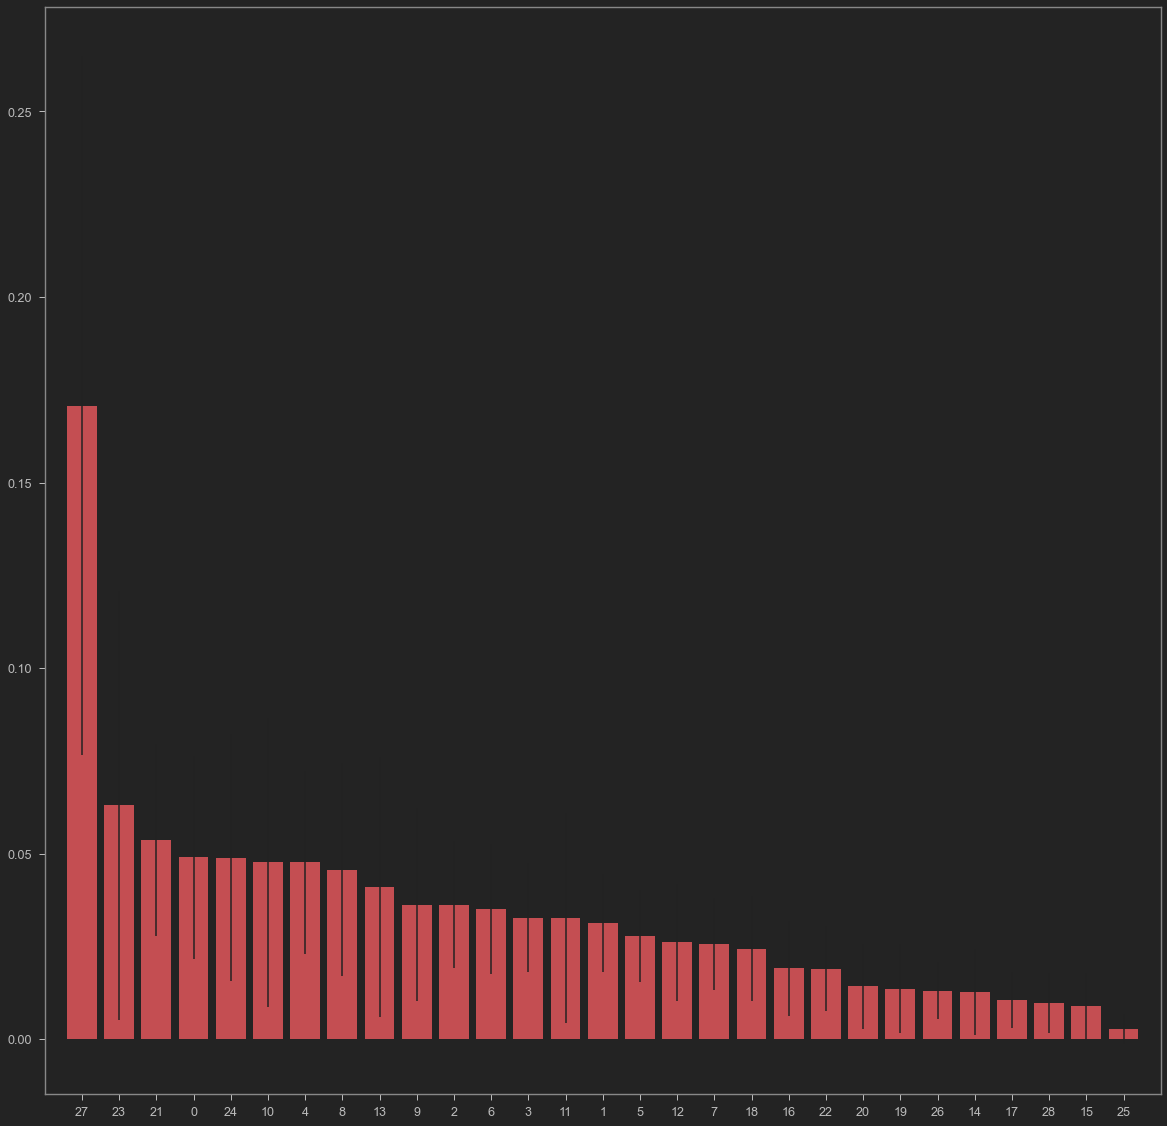

In [25]:
rand_forest_fit = RandomForestClassifier(n_estimators=500, criterion="gini", max_depth=30, min_samples_split=2, min_samples_leaf=2)
rand_forest_fit.fit(x_train, y_train)
importances = rand_forest_fit.feature_importances_
standard_deviations = np.std([tree.feature_importances_ for tree in rand_forest_fit.estimators_], axis=0)
indices = np.argsort(importances)[::-1]
column_names = list(x_train.columns)

print("Feature ranking:")
for feature in range(x_train.shape[1]):
    print ("Feature", indices[feature], ",", column_names[indices[feature]], importances[indices[feature]])
    
plt.figure(figsize=(20,20))
plt.bar(range(x_train.shape[1]), importances[indices], color="r", yerr=standard_deviations[indices], align="center")
plt.xticks(range(x_train.shape[1]), indices)
plt.xlim([-1, x_train.shape[1]])
plt.show()

### Using top 10 features from Random Forest feature importance

In [26]:
X_important=df_cluster[['MonthlyIncome','TotalWorkingYears', 'Age', 'DistanceFromHome', 'YearsAtCompany',
                         'YearsWithCurrManager', 'YearsInCurrentRole', 'MaritalStatus_Single', 'OverTime_1', 'NumCompaniesWorked']]
X_important.head()

,MonthlyIncome,TotalWorkingYears,Age,DistanceFromHome,YearsAtCompany,YearsWithCurrManager,YearsInCurrentRole,MaritalStatus_Single,OverTime_1,NumCompaniesWorked
0,5993,8,41,1,6,5,4,1,1,8
1,5130,10,49,8,10,7,7,0,0,1
2,2090,7,37,2,0,0,0,1,1,6
3,2909,8,33,3,8,0,7,0,1,1
4,3468,6,27,2,2,2,2,0,0,9


### Creating the DataFrame for Survival Analysis

In [27]:
df_survival=pd.concat([X_important, hr_df['Attrition'], pd.DataFrame({'Cluster':labels})],axis=1)
df_survival.head()

,MonthlyIncome,TotalWorkingYears,Age,DistanceFromHome,YearsAtCompany,YearsWithCurrManager,YearsInCurrentRole,MaritalStatus_Single,OverTime_1,NumCompaniesWorked,Attrition,Cluster
0,5993,8,41,1,6,5,4,1,1,8,1,0
1,5130,10,49,8,10,7,7,0,0,1,0,5
2,2090,7,37,2,0,0,0,1,1,6,1,7
3,2909,8,33,3,8,0,7,0,1,1,0,7
4,3468,6,27,2,2,2,2,0,0,9,0,1


<AxesSubplot:xlabel='Attrition', ylabel='YearsAtCompany'>

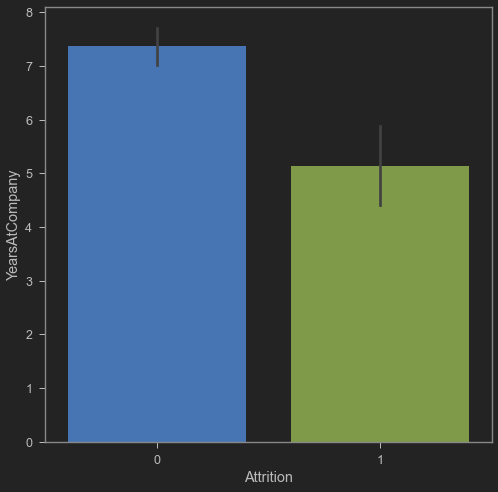

In [28]:
plt.figure(figsize=(8,8))
sns.barplot(data=df_survival, x=df_survival['Attrition'], y=df_survival['YearsAtCompany'])

In [29]:
df_survival.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype
---  ------                --------------  -----
 0   MonthlyIncome         1470 non-null   int64
 1   TotalWorkingYears     1470 non-null   int64
 2   Age                   1470 non-null   int64
 3   DistanceFromHome      1470 non-null   int64
 4   YearsAtCompany        1470 non-null   int64
 5   YearsWithCurrManager  1470 non-null   int64
 6   YearsInCurrentRole    1470 non-null   int64
 7   MaritalStatus_Single  1470 non-null   uint8
 8   OverTime_1            1470 non-null   uint8
 9   NumCompaniesWorked    1470 non-null   int64
 10  Attrition             1470 non-null   int32
 11  Cluster               1470 non-null   int32
dtypes: int32(2), int64(8), uint8(2)
memory usage: 106.4 KB


### Using the Kaplan-Meier Model

In [30]:
from lifelines import KaplanMeierFitter

In [31]:
kmf=KaplanMeierFitter()
kmf.fit(df_survival['YearsAtCompany'], df_survival['Attrition'], label='Kaplan Meier Estimate')

<lifelines.KaplanMeierFitter:"Kaplan Meier Estimate", fitted with 1470 total observations, 1233 right-censored observations>

### The Kaplan-Meier estimator is a non-parametric estimator that allows us to use observed data to estimate the survival distribution. The curve plots the cumulative probability of survival beyond each given time period.

<AxesSubplot:xlabel='timeline'>

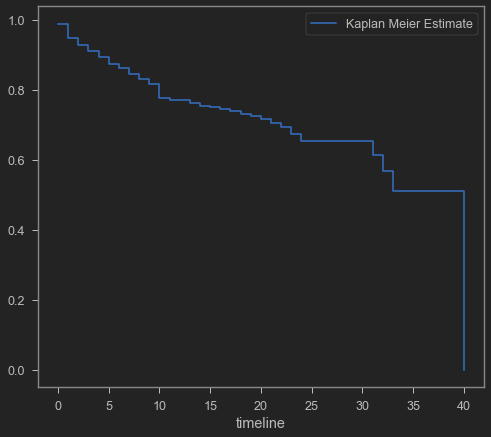

In [32]:
kmf.plot(ci_show=False)

### Plotting the Kaplan- Meier Curve per Cluster

In [33]:
clust=pd.DataFrame({'Cluster':labels})
clust_0=df_survival[df_survival['Cluster']==0]
clust_1=df_survival[df_survival['Cluster']==1]
clust_2=df_survival[df_survival['Cluster']==2]
clust_3=df_survival[df_survival['Cluster']==3]
clust_4=df_survival[df_survival['Cluster']==4]
clust_5=df_survival[df_survival['Cluster']==5]
clust_6=df_survival[df_survival['Cluster']==6]
clust_7=df_survival[df_survival['Cluster']==7]
clust_8=df_survival[df_survival['Cluster']==8]
clust_9=df_survival[df_survival['Cluster']==9]



### The survival function measures the probability that a cluster will survive past year "t". Using the Kaplan-Meier curve allows us to visually inspect differences in survival rates by cluster category.

Text(0, 0.5, 'Survival probability')

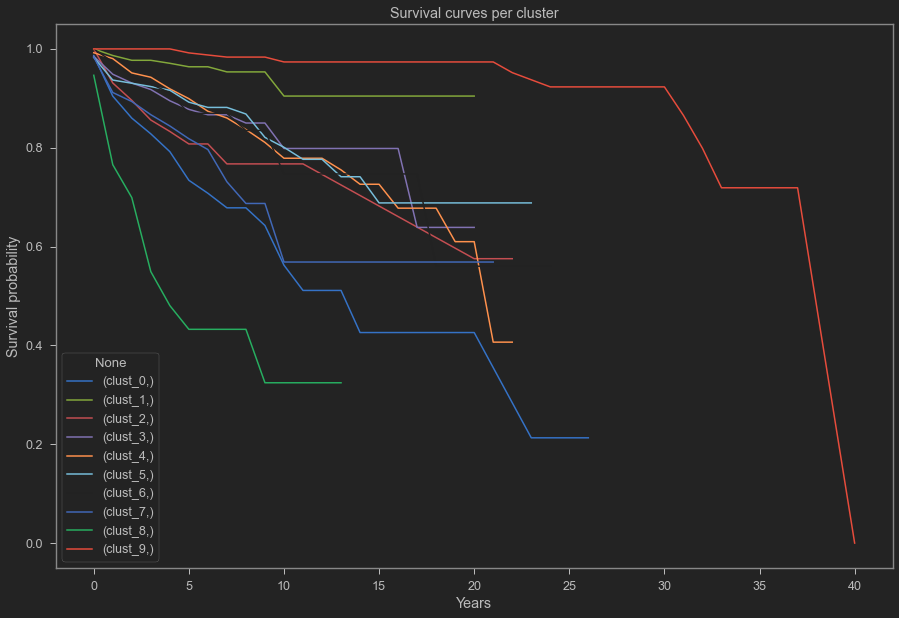

In [34]:
ax = plt.axes()
kmf.fit(clust_0['YearsAtCompany'], clust_0['Attrition'], label=['clust_0'])
kmf.survival_function_.plot(figsize=(15,10),ax=ax)
kmf.fit(clust_1['YearsAtCompany'], clust_1['Attrition'], label=['clust_1'])
kmf.survival_function_.plot(figsize=(15,10),ax=ax)
kmf.fit(clust_2['YearsAtCompany'], clust_2['Attrition'], label=['clust_2'])
kmf.survival_function_.plot(figsize=(15,10),ax=ax)
kmf.fit(clust_3['YearsAtCompany'], clust_3['Attrition'], label=['clust_3'])
kmf.survival_function_.plot(figsize=(15,10),ax=ax)
kmf.fit(clust_4['YearsAtCompany'], clust_4['Attrition'], label=['clust_4'])
kmf.survival_function_.plot(figsize=(15,10),ax=ax)
kmf.fit(clust_5['YearsAtCompany'], clust_5['Attrition'], label=['clust_5'])
kmf.survival_function_.plot(figsize=(15,10),ax=ax)
kmf.fit(clust_6['YearsAtCompany'], clust_6['Attrition'], label=['clust_6'])
kmf.survival_function_.plot(figsize=(15,10),ax=ax)
kmf.fit(clust_7['YearsAtCompany'], clust_7['Attrition'], label=['clust_7'])
kmf.survival_function_.plot(figsize=(15,10),ax=ax)
kmf.fit(clust_8['YearsAtCompany'], clust_8['Attrition'], label=['clust_8'])
kmf.survival_function_.plot(figsize=(15,10),ax=ax)
kmf.fit(clust_9['YearsAtCompany'], clust_9['Attrition'], label=['clust_9'])
kmf.survival_function_.plot(figsize=(15,10),ax=ax)

plt.title('Survival curves per cluster')
plt.xlabel('Years')
plt.ylabel('Survival probability')

In [35]:
kmf.survival_function_.reset_index().iloc[:, 1]

0     1.000000
1     1.000000
2     1.000000
3     1.000000
4     1.000000
5     0.991935
6     0.983457
7     0.983457
8     0.983457
9     0.973623
10    0.973623
11    0.973623
12    0.973623
13    0.973623
14    0.973623
15    0.973623
16    0.973623
17    0.973623
18    0.973623
19    0.973623
20    0.973623
21    0.951987
22    0.923139
23    0.923139
24    0.923139
25    0.923139
26    0.923139
27    0.923139
28    0.865443
29    0.798870
30    0.718983
31    0.718983
32    0.718983
33    0.718983
34    0.000000
Name: (clust_9,), dtype: float64

### Using Cox Proportional Hazard Model

<b>We can examine the confidence interval of different important features to assess its significance.</b>

In [36]:
from lifelines import CoxPHFitter

In [37]:
cph = CoxPHFitter()

In [38]:
cph.fit(df_survival, duration_col='YearsAtCompany', event_col='Attrition')

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>

In [39]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 1470 total observations, 1233 right-censored observations>
             duration col = 'YearsAtCompany'
                event col = 'Attrition'
      baseline estimation = breslow
   number of observations = 1470
number of events observed = 237
   partial log-likelihood = -1244.97
         time fit was run = 2021-03-18 18:41:27 UTC

---
                       coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                    
MonthlyIncome         -0.00       1.00       0.00            -0.00            -0.00                 1.00                 1.00
TotalWorkingYears     -0.15       0.86       0.03            -0.21            -0.09                 0.81                 0.91
Age                   -0.03       0.97       0.01            -0.05            -0.00                 0.95                 1.00
DistanceFromHome       0.02       1.02       0.01             0.00             0.04                 1.00                 1.04
YearsWithCurrManager  -0.30       0.74       0.03            -0.36            -0.24                 0.70                 0.79
YearsInCurrentRole    -0.29       0.75       0.03            -0.35            -0.23                 0.70                 0.80
MaritalStatus_Single   0.90       2.45       0.13             0.63             1.16                 1.88                 3.19
OverTime_1             1.20       3.31       0.15             0.90             1.49                 2.46                 4.46
NumCompaniesWorked     0.21       1.23       0.03             0.16             0.26                 1.17                 1.30
Cluster               -0.02       0.98       0.03            -0.08             0.04                 0.92                 1.05

                         z      p   -log2(p)
covariate                                   
MonthlyIncome        -2.86 <0.005       7.86
TotalWorkingYears    -4.99 <0.005      20.67
Age                  -2.41   0.02       5.97
DistanceFromHome      2.52   0.01       6.39
YearsWithCurrManager -9.26 <0.005      65.45
YearsInCurrentRole   -8.84 <0.005      59.89
MaritalStatus_Single  6.68 <0.005      35.29
OverTime_1            7.88 <0.005      48.07
NumCompaniesWorked    8.13 <0.005      51.09
Cluster              -0.55   0.58       0.78
---
Concordance = 0.93
Partial AIC = 2509.93
log-likelihood ratio test = 658.31 on 10 df
-log2(p) of ll-ratio test = 445.99

### Based on p-values < 0.05 and below plot, we can see that the main significant features includes: 
- AGE
- MONTHLY INCOME
- TOTAL WORKING YEARS
- YEARS WITH CURRENT MANAGER
- YEARS IN CURRENT ROLE 

### These features are the main drivers for employees to stay at the company.

<AxesSubplot:xlabel='log(HR) (95% CI)'>

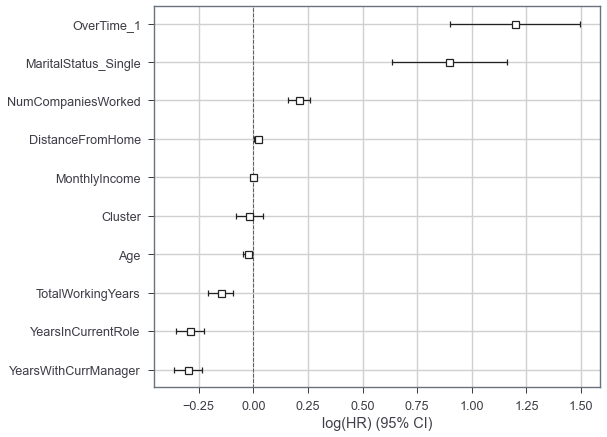

In [40]:
from jupyterthemes import jtplot
jtplot.style(theme='grade3',context='notebook',ticks=True, grid=True)
cph.plot()

In [41]:
import os
from pathlib import Path
import pickle

pickle.dump(ss, open(Path().resolve().parent.joinpath('app').joinpath('ss.sav'), 'wb'))
pickle.dump(grid_search, open(Path().resolve().parent.joinpath('app').joinpath('grid_search.sav'), 'wb'))
pickle.dump(df_survival, open(Path().resolve().parent.joinpath('app').joinpath('survival_df.sav'), 'wb'))
pickle.dump(kmf, open(Path().resolve().parent.joinpath('app').joinpath('kmf.sav'), 'wb'))
